In [2]:
import warnings
warnings.filterwarnings('ignore')

# Embeddings w Gensim, words Similarity and Analogy, Clustering w Kmeans and vis w PCA

# Embeddings With Gensim

In this notebook, I will use *word embedding vectors** to cluster hundreds of words based on their meanings.

Let's first load a word embedding model with Gensim's downloader API:

In [3]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-200')

GloVe is Dimensional Word Vectors Trained on Common Crawl.  
GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity.  
  
  
We can then access word embedding vectors with the following syntax:

In [5]:
model['house']

array([ 4.7641e-01, -5.6269e-04,  4.9202e-02, -7.3879e-01,  3.7132e-02,
       -1.2158e-01, -4.6408e-02,  2.3389e-01,  8.8552e-02,  2.3504e-01,
        4.9984e-01, -2.5752e-02,  8.6279e-01, -5.6084e-01, -1.5898e-02,
        3.8606e-01, -4.0744e-01, -7.8242e-02, -4.9744e-01,  2.3597e-01,
       -2.5095e-01,  2.5800e+00,  2.3732e-01, -1.3906e-01,  3.2639e-01,
       -3.9747e-01, -7.6958e-02, -2.7866e-01,  4.1035e-01,  2.3829e-01,
       -4.1175e-02, -6.7140e-01,  4.4805e-01,  1.9617e-01, -5.8027e-01,
        1.7948e-01, -9.3515e-02, -3.6991e-01,  8.2635e-01,  1.7027e-01,
       -1.0140e-01,  5.4630e-02, -1.8867e-01,  5.2122e-01, -1.5975e-01,
        1.3666e-01,  5.4290e-01,  1.9361e-01, -9.2103e-02,  5.6441e-01,
        1.4980e-02,  1.5426e-01,  4.4921e-01,  2.5681e-01, -3.7364e-02,
       -4.5421e-02,  1.8183e-01, -1.2785e-01, -2.4702e-01,  3.6216e-01,
        5.0130e-01,  2.7318e-01,  1.0898e-01, -2.7041e-01,  3.7572e-01,
       -7.0259e-01, -9.0682e-01, -1.8616e-01, -4.0091e-02,  4.05

What are the dimensions of the vectors returned by this model?

In [3]:
model['house'].shape

(200,)

The three words most similar to the word [*brown*,*kitchen*] in the model:

## Word similarity

In [10]:
model.most_similar(positive=['brown'],topn=3)

[('gray', 0.6616377830505371),
 ('green', 0.6384711265563965),
 ('white', 0.6364924311637878)]

In [7]:
model.most_similar(positive=['kitchen'],topn=3)

[('bathroom', 0.6923505067825317),
 ('room', 0.68036949634552),
 ('dining', 0.6487982869148254)]

An example of two words that are very dissimilar from one another in the model (or in other words, similarity check):

In [6]:
model.similarity('chair', 'tomato')

0.020459713

## Word analogies

An example of **word analogies** (e.g. king-queen=waiter-waitress). Can reflect by adding and subtracting word vectors:

In [7]:
model.most_similar(positive = ['cow', 'pork'], negative = ['beef'], topn = 3)

[('pig', 0.6433343887329102),
 ('hog', 0.572226881980896),
 ('pigs', 0.5682295560836792)]

The argument positive are the words we want to be positively related to, and the argument negative are the words we want not to be related to, Thus is our example, we seek for the 3 most similar words to 'cow' and 'pork' but that are not related to 'beef', so eventually we get words that are only related to 'pork' which is not a beef (cow's meat) but a pig's meat.

Another example of a word analogy using the most_similar function:

In [23]:
model.most_similar(positive = ['tree', 'human'], negative = ['branch'], topn = 3)

[('trees', 0.5030538439750671),
 ('animals', 0.4924492835998535),
 ('flesh', 0.48841607570648193)]

## Clustering and Coloring Words with Gensim

I will be analyzing the list of words in the attached file *mixed_words.txt*.

In the text file I can see some repeating related words such as colors, foods, investigations, materials, elements, etc...<br>
I guess some topics will include foods (maybe recipes or reviews), some reports about crimes or accidents, maybe articles about design and colors.

In [26]:
import numpy as np
words = [word.split()[0] for word in open('mixed_words.txt')]
missing_words = [word for word in words if model.has_index_for(word) == False]

In [27]:
print(f"There are {len(words)-len(missing_words)} words in our embedding model.")
print(f"There is {len(missing_words)} word that is missing.")
print(f"The missing words are: {missing_words}.")

There are 321 words in our embedding model.
There is 1 word that is missing.
The missing words are: ['kedgeree'].


I will make a matrix X whose rows are the word embedding vectors for each word in the model.

In [28]:
words_in_model = [word for word in words if model.has_index_for(word) == True]
X = model[words_in_model]

In [29]:
X.shape

(321, 200)

## Clustring with Kmeans
Cluster the words by using sklearn.cluster.KMeans with n_clusters = 2, fitting it to the matrix X, and saving the predicted labels in a variable called *labels*.

In [30]:
from sklearn.cluster import KMeans

In [31]:
def run_kmeans(num_clusters):
    clkm = KMeans(n_clusters=num_clusters)
    clkm.fit(X)
    return clkm.labels_

In [32]:
labels = run_kmeans(2)

In [33]:
cluster1 = [word for i, word in enumerate(words_in_model) if labels[i] == 0]
cluster2 = [word for i, word in enumerate(words_in_model) if labels[i] == 1]

In [34]:
# Words in cluster 1
for i in range(10):
    print(cluster1[i])

walnut
green
coffee
pemmican
sulfur
stew
tawny
dandelion
jam
grape


In [35]:
# Words in cluster 2
for i in range(10):
    print(cluster2[i])

conjunction
individualism
thesis
precinct
synthesis
or
weaker
context
obverse
completeness


## Using PCA to project words on 2D graph

Now let's use PCA to project our data points onto two dimensions and visualize them. The colors displayed correspond to the k-means clusters:

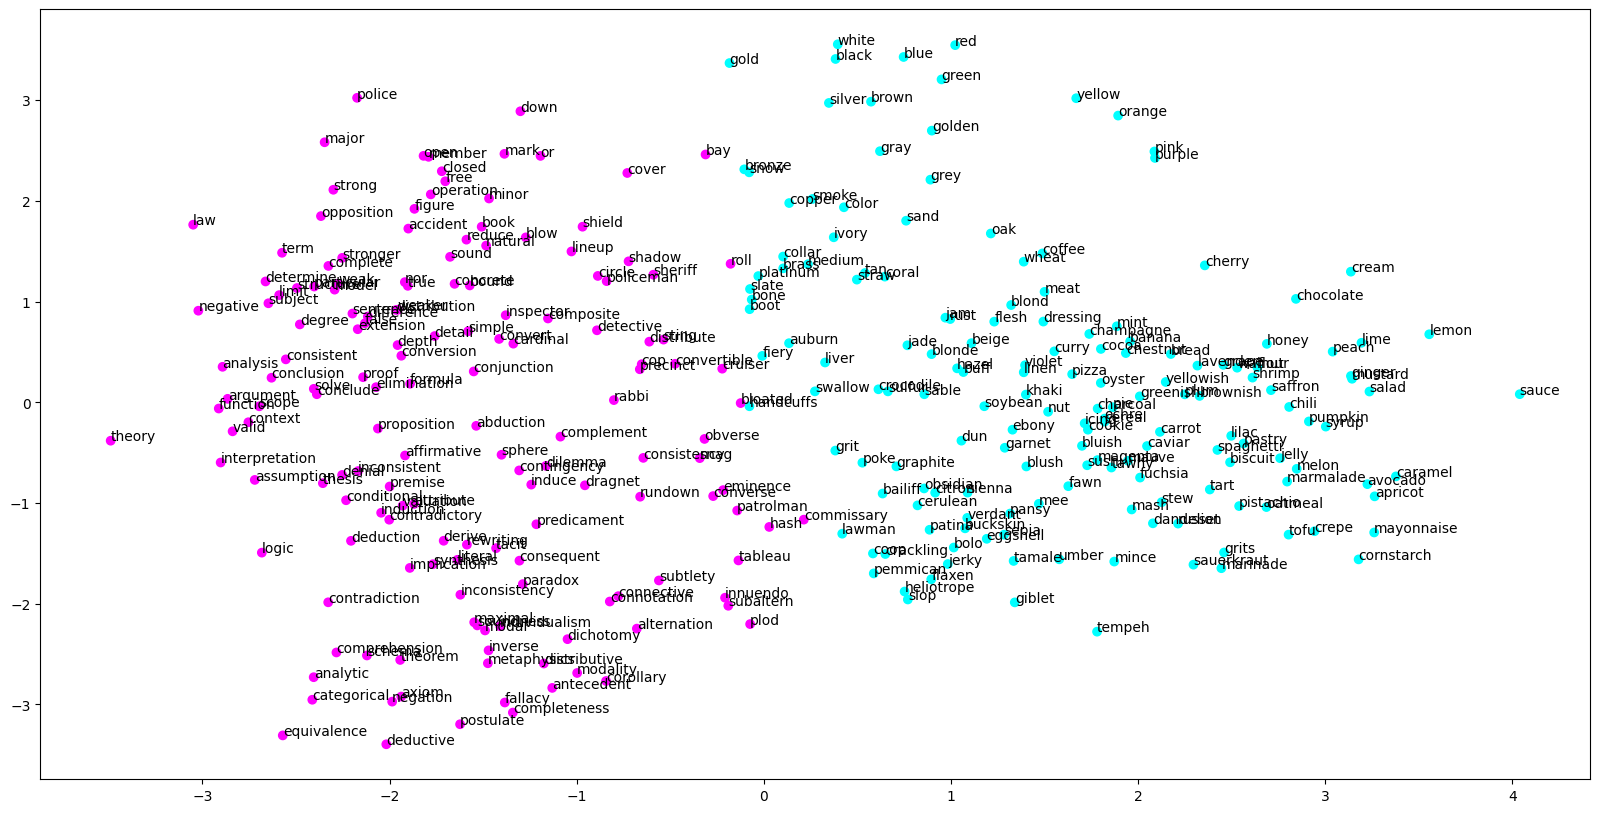

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(words_in_model):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

I've tried several number of k-means clusters and I think the right number of clusters is arround 5-6.

In [38]:
labels = run_kmeans(6)

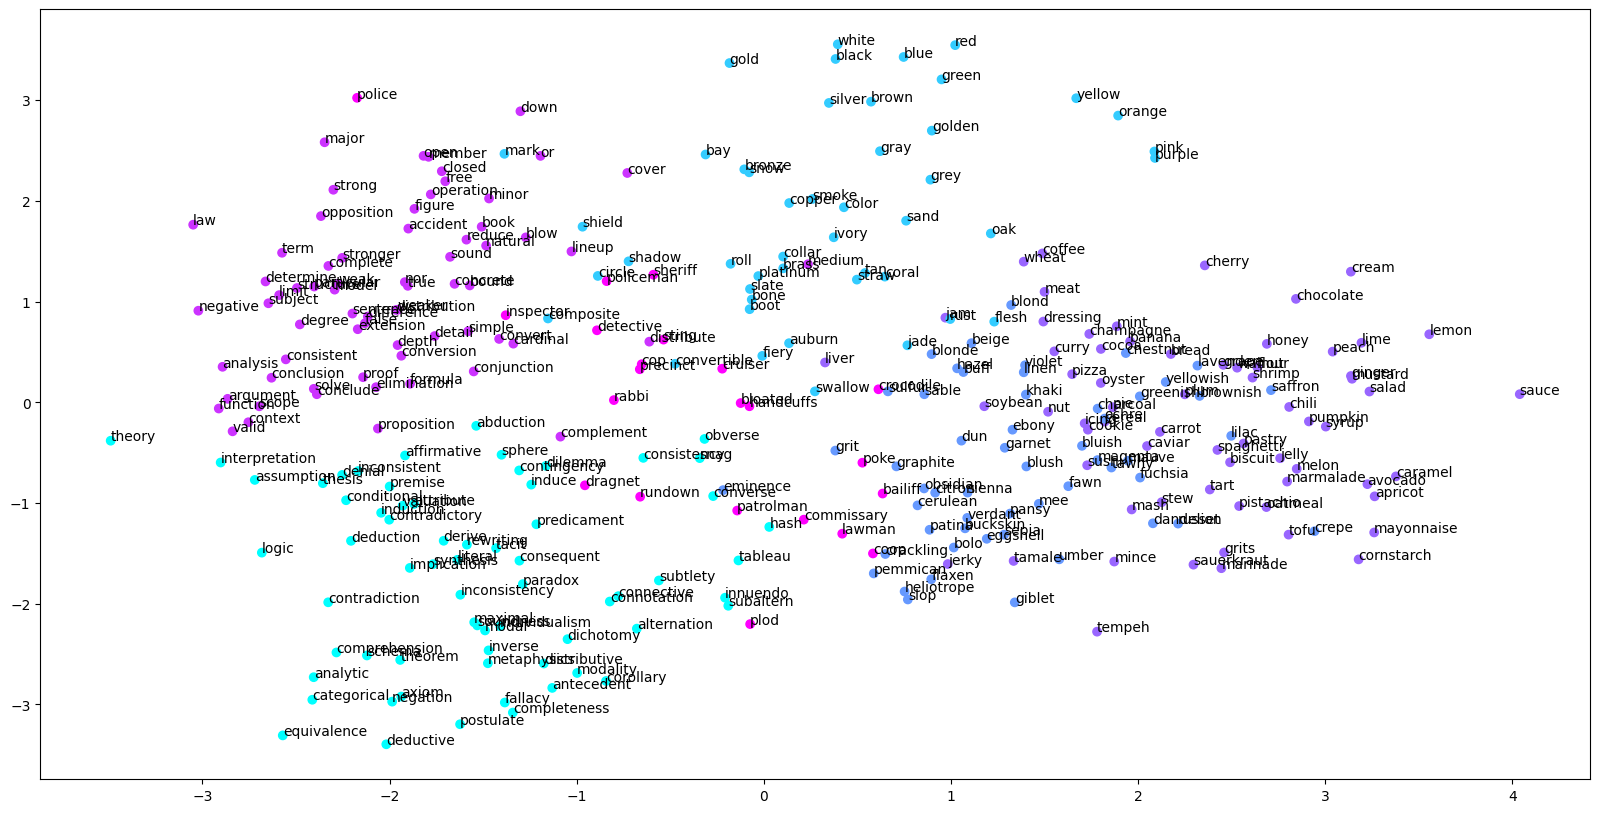

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(words_in_model):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

**The clusters represent:**<br>
light purple - foods / recipes<br>
aqua - special colors (hues)<br>
orchid - colors<br>
pink - law documents<br>
light blue - police related articles<br>
blue - proof/science articles<br>
